# <center>台北市交通事故分析</center>

# 一、問題陳述:

## 1.使用台北市車禍男女比例來探討數量比例可以判斷什麼。
## 2.預測來年車禍所造成的傷亡人數。


# 二、動機:

## 事故傷害一直以來都位於國人死因統計前十名，2018年就有6,846人死於交通事故，剛好台北資料大平台上有101~108年的事故統計，中華民國交通部公路總局也有提供需要的資料，資料說明完整且資料量足夠，故想從這塊討論發展。

# 三、預期成果

## 1. 預計女生發生車禍次數較少，但可以從這點去探討，究竟女性(不)擅長駕駛還是女性駕駛較男性稀少。
## 2. 預測來年車禍所造成的傷亡人數(多元線性回歸):<br>自變數(變因):1.天氣2.速限3.時段


# 四、數據預覽

## 車禍資料於台北資料大平台上下載，以CSV檔載入，以下為引進程式碼:

In [1]:
import chardet
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing
from sklearn.preprocessing import normalize
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
def side_by_side(*objs, **kwds):
    from pandas.io.formats.printing import adjoin
    space = kwds.get('space', 4)
    reprs = [repr(obj).split('\n') for obj in objs]
    print (adjoin(space, *reprs))
    print()
    return

df101=pd.read_csv(r'./data/101年-臺北市A1及A2類交通事故明細.csv.csv',encoding='big5')
df102=pd.read_csv(r'./data/102年-臺北市A1及A2類交通事故明細.csv.csv',encoding='big5')
df103=pd.read_csv(r'./data/103年-臺北市A1及A2類交通事故明細.csv.csv',encoding='big5')
df104=pd.read_csv(r'./data/104年-臺北市A1及A2類交通事故明細.csv.csv',encoding='utf-8')
df105=pd.read_csv(r'./data/105年-臺北市A1及A2類交通事故明細.csv.csv',encoding='big5')
df106=pd.read_csv(r'./data/106年-臺北市A1及A2類交通事故明細.csv.csv',encoding='big5')
df107=pd.read_csv(r'./data/107年-臺北市A1及A2類交通事故明細.csv.csv',encoding='big5')
df108=pd.read_csv(r'./data/108年-臺北市A1及A2類交通事故明細.csv.csv',encoding='big5')

In [2]:
result = pd.concat([df101,df102,df103,df104,df105,df106,df107,df108],axis=0)

In [3]:
result.sample(5)

,發生年,發生月,發生日,發生時,發生分,處理別,區序,肇事地點,死亡人數,受傷人數,當事人序,車種,性別,年齡,受傷程度,4天候,7速限,8道路型態,9事故位置
42922,106,11,30,18,20,2,12內湖區,內湖區內湖路1段600巷口,0,1,1,A05,1.0,58.0,4.0,6.0,50.0,14.0,7.0
2547,102,9,23,12,34,2,01大同區,民權西路/承德路,0,1,2,C03,1.0,22.0,2.0,8.0,50.0,4.0,1.0
10931,103,4,30,13,45,2,03中山區,民權東路2段92巷口,0,2,1,C03,1.0,60.0,2.0,7.0,50.0,4.0,1.0
14039,103,6,5,16,15,2,04大安區,仁愛路 建國南路,0,1,1,B12,1.0,60.0,3.0,7.0,0.0,4.0,1.0
48587,108,5,19,11,35,2,07信義區,信義區富陽街與富陽街72巷口,0,2,1,F01,1.0,13.0,2.0,8.0,50.0,4.0,1.0


## 下圖為不合理的資料，每一年的資料表或多或少會有一些紀律失誤，應將其移除

<img src="./data/picture_1.jpg">

#### 將100歲以上的剔除

In [4]:
age=result.query('年齡>100').index.tolist()
result = result.drop(age)
result.index = range(len(result))

## 各區序車禍人數統計之長條圖

In [5]:
location = result['區序'].values.astype(str)

In [6]:
from sklearn.preprocessing import LabelEncoder

style_le = LabelEncoder()
style_labels = style_le.fit_transform(location)
x = {index: label for index, label in enumerate(style_le.classes_)}
x = list(x.values())
x

['01大同區',
 '02萬華區',
 '03中山區',
 '04大安區',
 '05中正區',
 '06松山區',
 '07信義區',
 '08士林區',
 '09北投區',
 '10文山區',
 '11南港區',
 '12內湖區']

In [7]:
y=[]
for i in x:
    s = '區序 == "' + i + '"'
    y.append(len(result.query(s)))
y

[23373,
 20153,
 47872,
 33749,
 36683,
 22157,
 37161,
 29423,
 39054,
 36437,
 14134,
 34769]

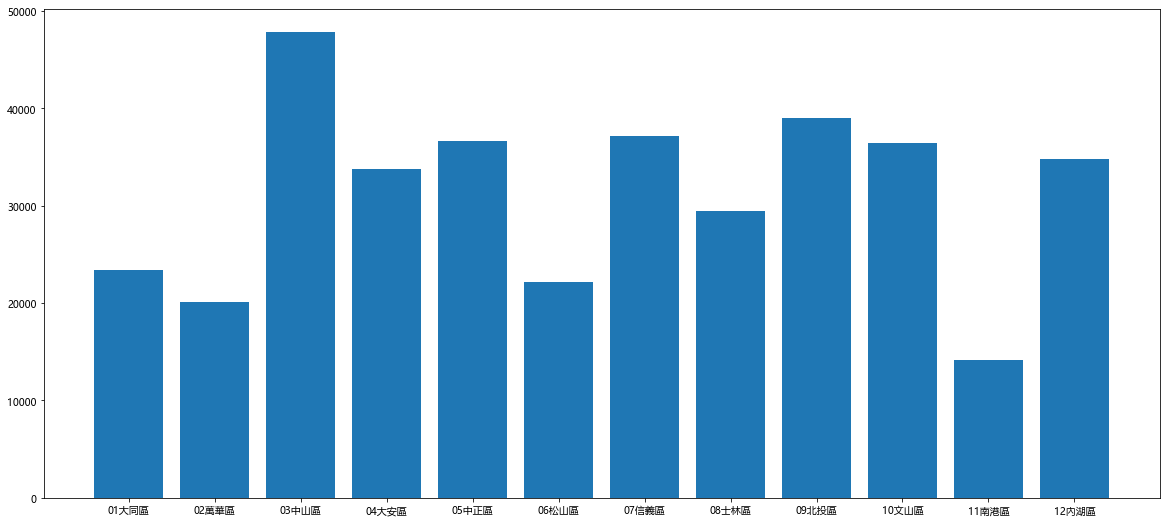

In [8]:
plt.rcParams['font.sans-serif'] =['Microsoft YaHei']
plt.figure(figsize=(20,9)) 
plt.bar(x,y)
plt.show()

## 受傷程度圓餅圖

In [9]:
degree = [1,2,3,4,5]

In [10]:
y=[]
for i in degree:
    s = '受傷程度 == ' +str(i) 
    y.append(len(result.query(s)))
y

[606, 215492, 134470, 15513, 28]

In [11]:
x = ['24小時內死亡','受傷','未受傷','不明','2-30日內死亡']

([<matplotlib.patches.Wedge at 0x22c0ed22088>,
 [Text(1.0999851274346433, 0.005720089386672552, '24小時內死亡'),
  Text(-0.3132267857387828, 1.054461464775148, '受傷'),
  Text(0.16458789783295721, -1.0876170391672466, '未受傷'),
  Text(1.090197932400009, -0.1465212209570527, '不明'),
  Text(1.5499999552190047, -0.0003725870144429147, '2-30日內死亡')],
 [Text(0.4999932397430197, 0.0026000406303057053, '0.166%'),
  Text(-0.1423758116994467, 0.47930066580688546, '58.860%'),
  Text(0.07481268083316236, -0.49437138143965753, '36.729%'),
  Text(0.4955445147272768, -0.0666005549804785, '4.237%'),
  Text(0.9499999725535835, -0.0002283597830456574, '0.008%')])

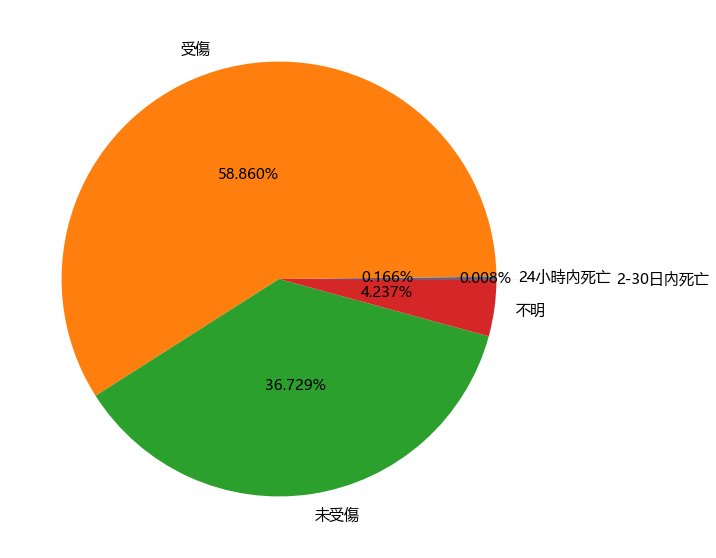

In [12]:
plt.figure(figsize=(10,10))
separeted = (0, 0, 0, 0, 0.45)
plt.pie(y,                           # 數值
        labels = x,                # 標籤
        autopct = "%1.3f%%",            # 將數值百分比並留到小數點一位
        explode = separeted,
        pctdistance = 0.5,              # 數字距圓心的距離
        textprops = {"fontsize" : 15},  # 文字大小
       )

### (1)24小時內死亡:0.165% <br>(2)受傷:58.643% <br>(3)未受傷:36.563% <br>(4)不明:4.621% <br>(5)2-30日內死亡:0.007%

## 月份車禍數

In [13]:
month = [1,2,3,4,5,6,7,8,9,10,11,12]

In [14]:
y=[]
for i in month:
    s = '發生月==' +str(i) 
    y.append(len(result.query(s)))
y

[32775,
 25601,
 31287,
 29791,
 31232,
 29484,
 31021,
 30639,
 30343,
 33119,
 33490,
 36183]

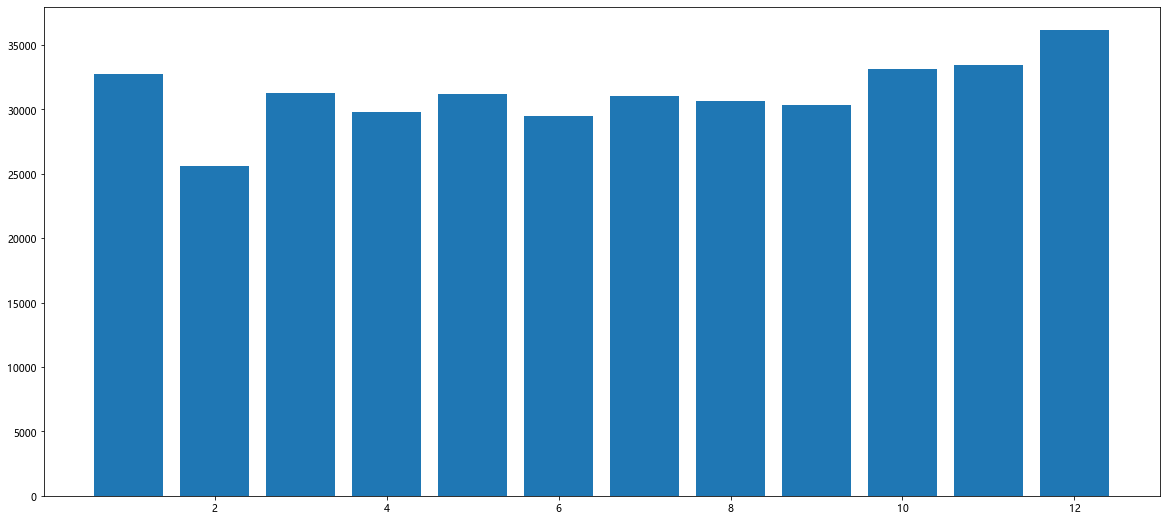

In [15]:
plt.figure(figsize=(20,9)) 
plt.bar(month,y)
plt.show()

## 以下為引進交通事故對照表的程式碼以及資料初步呈現:

In [16]:
dfcar=pd.read_csv(r'./data/交通事故代碼對照表.csv.csv',encoding='big5')
dfcar

,欄位名稱,代碼,對應項目,備註
0,處理別,1,A1類交通事故,造成人員當場或二十四小時內死亡之交通事故。
1,處理別,2,A2類交通事故,造成人員受傷或超過二十四小時死亡之交通事故。
2,車種,A01,公營公車,大客車
3,車種,A02,民營公車,NaN
4,車種,A03,公營客運,NaN
...,...,...,...,...
99,事故位置,18,行人穿越道,其他
100,事故位置,19,穿越道附近,NaN
101,事故位置,20,人行道,NaN
102,事故位置,21,收費站附近,NaN


## 這裡我們想要將101-108年車禍資料將交通事故對照表中做結合，在101~108車禍資料中，加入每一個項目應有的車種對應項目:

In [17]:
dfcar=dfcar[dfcar['欄位名稱']=='車種'][['代碼','對應項目']]
dfcar.rename(columns={'代碼':'車種'},inplace=True)
result = pd.merge(result,dfcar,on=['車種'],how='left')

In [18]:
result.sample(5)

,發生年,發生月,發生日,發生時,發生分,處理別,區序,肇事地點,死亡人數,受傷人數,當事人序,車種,性別,年齡,受傷程度,4天候,7速限,8道路型態,9事故位置,對應項目
95728,103,7,8,20,0,2,03中山區,民權東路2段92巷口,0,2,2,C03,1.0,24.0,2.0,8.0,50.0,4.0,1.0,普通重型機車
148863,104,5,1,7,28,2,01大同區,台北橋機車道往三重,0,3,1,C03,1.0,65.0,3.0,8.0,50.0,8.0,11.0,普通重型機車
358931,108,1,3,13,34,2,10文山區,文山區木柵路4段77號,0,1,1,B12,1.0,46.0,3.0,6.0,50.0,15.0,9.0,自用小貨車
172914,104,11,5,12,5,2,04大安區,忠孝東路 復興南路,0,1,1,C03,1.0,19.0,2.0,8.0,50.0,4.0,2.0,普通重型機車
327903,108,12,15,7,12,2,01大同區,大同區長安西路與塔城街口,0,1,1,C03,1.0,64.0,3.0,8.0,50.0,4.0,1.0,普通重型機車


# 台北市車禍男女比例探討。

## 以下簡略以直立圖觀察101~108年車禍男女比例，皆為男性居多

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


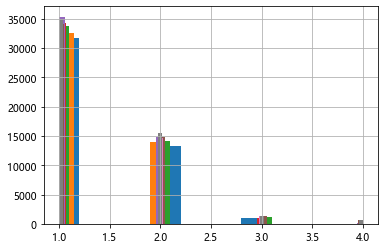

In [19]:
print(df101['性別'].hist(bins=10))
print(df102['性別'].hist(bins=20))
print(df103['性別'].hist(bins=30))
print(df104['性別'].hist(bins=40))
print(df105['性別'].hist(bins=50))
print(df106['性別'].hist(bins=60))
print(df107['性別'].hist(bins=70))
print(df108['性別'].hist(bins=80))

## 下圖為中華民國交通部統計全國縣市機車男女墉有機車比例，可做為比較{女性是否不擅駕駛}

<img src="./data/picture_2.jpg">

In [20]:
dfsex_car=pd.read_csv('./data/AAA.csv',encoding='big5')
dfsex_motorcycle=pd.read_csv('./data/BBB.csv',encoding='big5')
dfsex_car[dfsex_car["城市"] == " 臺北市 "]
dfsex_motorcycle[dfsex_motorcycle['城市']=='臺北市']

,城市,總計,男,女
2,臺北市,"890,127","577,650","312,477"


## 將108年資料，算出1(男性)和2(女性)的個數(3為無或物(動物、堆置物)、4為肇事逃逸):

In [21]:
df108['性別'].value_counts()

1    35041
2    15427
3     1260
4      705
Name: 性別, dtype: int64

## 下列為中華民國交通部統計的汽車(左)和機車(右)持有人數量:

In [22]:
dfsex_car

,城市,總計,男,女
0,總計,"6,806,455","3,404,654","3,401,801"
1,新北市,"850,164","467,862","382,302"
2,臺北市,"541,480","285,301","256,179"
3,桃園市,"681,379","332,022","349,357"
4,臺中市,"929,532","421,948","507,584"
5,臺南市,"596,559","283,340","313,219"
6,高雄市,"768,923","371,270","397,653"
7,宜蘭縣,"141,292","71,165","70,127"
8,新竹縣,"203,015","97,919","105,096"
9,苗栗縣,"200,734","102,262","98,472"


In [23]:
dfsex_motorcycle

,城市,總計,男,女
0,總計,"13,610,651","7,223,020","6,387,631"
1,新北市,"2,130,242","1,266,918","863,324"
2,臺北市,"890,127","577,650","312,477"
3,桃園市,"1,207,333","623,441","583,892"
4,臺中市,"1,688,486","828,662","859,824"
5,臺南市,"1,290,900","650,538","640,362"
6,高雄市,"1,981,247","996,247","985,000"
7,宜蘭縣,"263,852","134,821","129,031"
8,新竹縣,"295,853","158,320","137,533"
9,苗栗縣,"314,947","164,092","150,855"


## 只需要台北市資料:

In [24]:
dfsex_car[dfsex_car["城市"] == " 臺北市 "]

,城市,總計,男,女
2,臺北市,"541,480","285,301","256,179"


In [25]:
dfsex_motorcycle[dfsex_motorcycle["城市"] == "臺北市"]

,城市,總計,男,女
2,臺北市,"890,127","577,650","312,477"


# 結論一

## 男性持有車輛總數:285301+577650=862,951<br>女性持有車輛總數:256179+312477=568,656‬<br>A=35041/862951=0.040606013551175<br>B=15427/568656=0.0271288793224726<br>A>B:所以女性不是不擅長開車，反而比男生更小心謹慎，肇事率比男生低。


# 預測來年車禍所造成的傷亡人數

## 先將時間分為8份
### (1) 00:00~4:00   ->  凌晨時段 
### (2) 4:00~7:00     ->  清晨時段  
### (3) 7:00~9:00     ->  上班時段
### (4) 9:00~11:00   ->  早上時段
### (5) 11:00~13:00 ->  中午時段
### (6) 13:00~17:00 ->  下午時段
### (7) 17:00~20:00 ->  下班時段
### (8) 20:00~00:00 ->  晚上時段
 

In [26]:
time = []
for i in range(len(result)):
    if result['發生時'][i]>=0 and result['發生時'][i]<=3:
        time.append(1)
    elif result['發生時'][i]>=4 and result['發生時'][i]<=6:
        time.append(2)
    elif result['發生時'][i]>=7 and result['發生時'][i]<=8:
        time.append(3)
    elif result['發生時'][i]>=9 and result['發生時'][i]<=10:
        time.append(4)
    elif result['發生時'][i]>=11 and result['發生時'][i]<=12:
        time.append(5)
    elif result['發生時'][i]>=13 and result['發生時'][i]<=16:
        time.append(6)
    elif result['發生時'][i]>=17 and result['發生時'][i]<=19:
        time.append(7)
    else:
        time.append(8)
time = pd.DataFrame(time,columns=['time'])
result = pd.concat([result,time],axis=1)
result

,發生年,發生月,發生日,發生時,發生分,處理別,區序,肇事地點,死亡人數,受傷人數,...,車種,性別,年齡,受傷程度,4天候,7速限,8道路型態,9事故位置,對應項目,time
0,101,10,3,10,40,2,01大同區,大同區承德路與敦煌路口承德路 敦煌路,0,1,...,B03,1.0,30.0,3.0,8.0,0.0,4.0,2.0,自用小客車,4
1,101,10,3,10,40,2,01大同區,大同區承德路與敦煌路口承德路 敦煌路,0,1,...,C03,1.0,23.0,2.0,8.0,0.0,4.0,2.0,普通重型機車,4
2,101,1,29,12,30,2,01大同區,大同區民權西路與延平北路口延平北路 民權西路,0,2,...,C03,1.0,73.0,2.0,8.0,50.0,4.0,1.0,普通重型機車,5
3,101,1,29,12,30,2,01大同區,大同區民權西路與延平北路口延平北路 民權西路,0,2,...,C03,1.0,33.0,2.0,8.0,50.0,4.0,1.0,普通重型機車,5
4,101,2,2,23,50,2,01大同區,大同區承德路與庫倫街口承德路 庫倫街,0,1,...,B03,1.0,20.0,3.0,7.0,50.0,4.0,1.0,自用小客車,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374960,108,12,22,17,31,2,07信義區,信義區松壽路與松高路20巷口,0,1,...,H01,2.0,27.0,2.0,8.0,0.0,4.0,2.0,行人,7
374961,108,12,22,17,31,2,07信義區,信義區松壽路與松高路20巷口,0,1,...,H01,1.0,28.0,4.0,8.0,0.0,4.0,2.0,行人,7
374962,108,12,22,17,31,2,07信義區,信義區松壽路與松高路20巷口,0,1,...,B03,1.0,35.0,3.0,8.0,0.0,4.0,2.0,自用小客車,7
374963,108,12,26,7,20,2,07信義區,信義區永吉路127巷與基隆路1段83巷口,0,1,...,C03,2.0,59.0,3.0,8.0,30.0,4.0,2.0,普通重型機車,3


## 清除NaN值

In [27]:
corrcoef = result[["4天候","7速限","8道路型態","9事故位置","time","死亡人數","受傷人數"]]
corrcoef.columns = ["Weather","SpeedLimit","RoadPattern","AccidentLocation","time","death","injured"]
corrcoef = corrcoef.dropna()
corrcoef.isnull().any()
corrcoef.index = range(len(corrcoef))
corrcoef

,Weather,SpeedLimit,RoadPattern,AccidentLocation,time,death,injured
0,8.0,0.0,4.0,2.0,4,0,1
1,8.0,0.0,4.0,2.0,4,0,1
2,8.0,50.0,4.0,1.0,5,0,2
3,8.0,50.0,4.0,1.0,5,0,2
4,7.0,50.0,4.0,1.0,8,0,1
...,...,...,...,...,...,...,...
374231,8.0,0.0,4.0,2.0,7,0,1
374232,8.0,0.0,4.0,2.0,7,0,1
374233,8.0,0.0,4.0,2.0,7,0,1
374234,8.0,30.0,4.0,2.0,3,0,1


## 計算死傷人數

In [28]:
total = []
for i in range(len(corrcoef)):
    total.append(corrcoef['death'][i] + corrcoef['injured'][i])
total = pd.DataFrame(total)
total.columns = ["casualties"]
df = pd.concat([corrcoef,total],axis=1)
df

,Weather,SpeedLimit,RoadPattern,AccidentLocation,time,death,injured,casualties
0,8.0,0.0,4.0,2.0,4,0,1,1
1,8.0,0.0,4.0,2.0,4,0,1,1
2,8.0,50.0,4.0,1.0,5,0,2,2
3,8.0,50.0,4.0,1.0,5,0,2,2
4,7.0,50.0,4.0,1.0,8,0,1,1
...,...,...,...,...,...,...,...,...
374231,8.0,0.0,4.0,2.0,7,0,1,1
374232,8.0,0.0,4.0,2.0,7,0,1,1
374233,8.0,0.0,4.0,2.0,7,0,1,1
374234,8.0,30.0,4.0,2.0,3,0,1,1


## 查看統計數字

In [29]:
df.describe()

,Weather,SpeedLimit,RoadPattern,AccidentLocation,time,death,injured,casualties
count,374236.000000,374236.000000,374236.000000,374236.000000,374236.000000,374236.000000,374236.000000,374236.000000
mean,7.495655,44.867413,7.353459,4.465663,5.434656,0.004524,1.402382,1.406906
std,0.783407,12.047593,4.868270,4.475714,1.956194,0.076870,0.748077,0.752111
min,1.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,7.000000,40.000000,4.000000,1.000000,4.000000,0.000000,1.000000,1.000000
50%,8.000000,50.000000,4.000000,2.000000,6.000000,0.000000,1.000000,1.000000
75%,8.000000,50.000000,14.000000,9.000000,7.000000,0.000000,2.000000,2.000000
max,8.000000,501.000000,17.000000,22.000000,8.000000,4.000000,22.000000,22.000000


### 我們可以發現SpeedLimit的max值異常，而台灣最大速限約為110，所以我們將大於110的資料刪除

In [30]:
a=df.query('SpeedLimit>110').index.tolist()
df = df.drop(a)
df.index = range(len(df))

## 選擇特徵

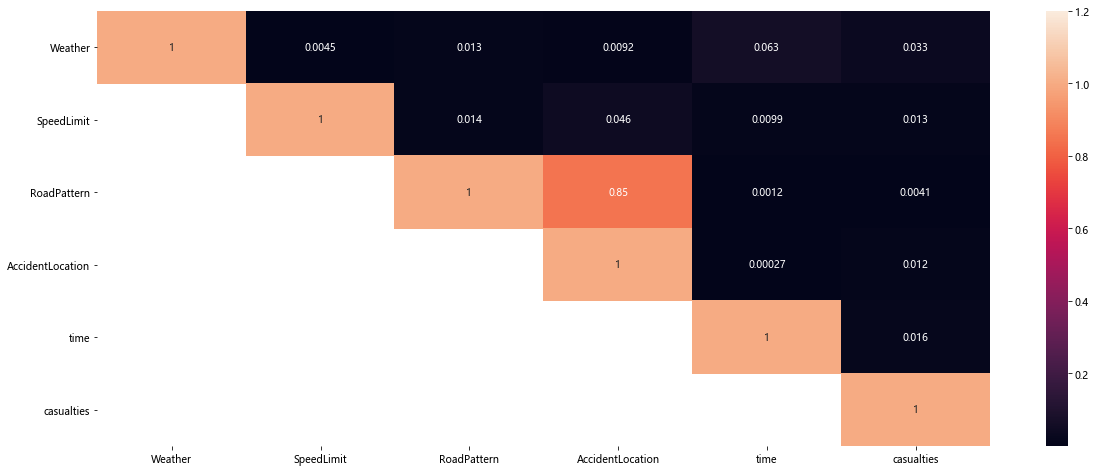

In [31]:

fig,ax = plt.subplots(figsize=(20,8))
corrcoef1 = abs(df[["Weather","SpeedLimit","RoadPattern","AccidentLocation","time","casualties"]].corr())
mask = np.array(corrcoef1)
mask[np.triu_indices_from(mask)] = False 
sns.heatmap(corrcoef1, mask=mask, vmax=1.2, annot=True, ax=ax)
plt.show();

In [32]:
upperTriangleDF = corrcoef1.where(np.triu(np.ones(corrcoef1.shape), k=1).astype(np.bool))
toDrop = [column for column in upperTriangleDF.columns[0:6] if any(upperTriangleDF[column] > 0.5)]
toDrop.append([ndx for ndx in upperTriangleDF['casualties'].index[0:6] if upperTriangleDF['casualties'].at[ndx]< 0.1][0])
remainFeatureDF = upperTriangleDF.drop(toDrop, axis=1)
side_by_side('拋棄的特徵:',toDrop,'選擇的特徵:',remainFeatureDF.columns)

'拋棄的特徵:'    ['AccidentLocation', 'Weather']    '選擇的特徵:'    Index(['SpeedLimit', 'RoadPattern', 'time', 'casualties'], dtype='object')



## 速限(SpeedLimit), 道路型態(RoadPattern), 時間(time)為變因來預測死傷人數(casualties)

In [33]:
x = np.array(df[['SpeedLimit', 'RoadPattern', 'time']])
y = np.array(df['casualties'])

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)

In [35]:
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
LR.score(x_test, y_test)

0.00035122609332693955

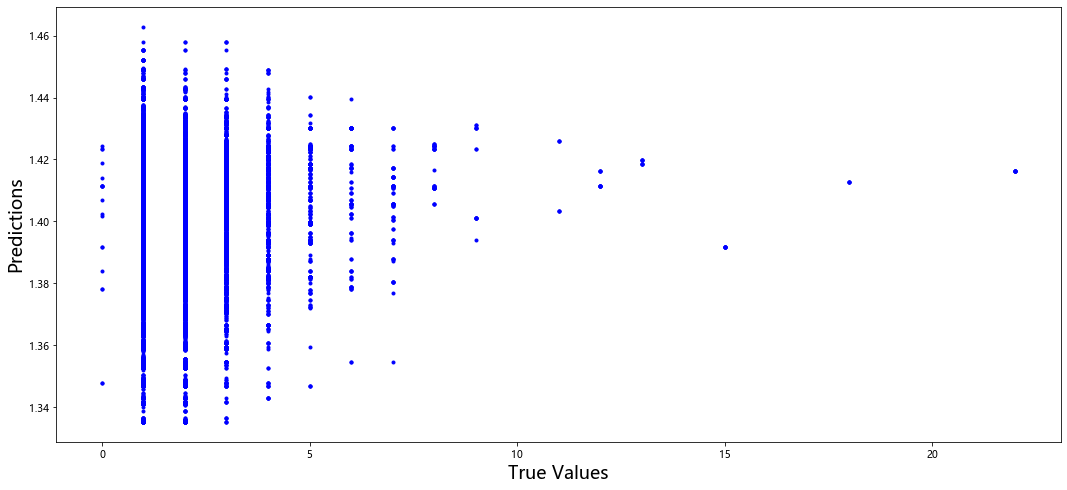

Performance:0.00035122609332693955


In [37]:
predictions = LR.predict(x_test)
fig,ax = plt.subplots(figsize=(18,8))
ax.plot(y_test,predictions,"b.")
ax.set_xlabel("True Values", fontsize=18)
ax.set_ylabel("Predictions", fontsize=18)
plt.show()
score = LR.score(x_test,y_test)

print(f'Performance:{score}')

#### 訓練結果為0.00035122609332693955

## 接下來我們想單純的只有一種車種，看是否能提升準確率

In [38]:
corrcoef_new = result[["車種","4天候","7速限","8道路型態","9事故位置","time","死亡人數","受傷人數"]]
corrcoef_new.columns = ["cartype","Weather","SpeedLimit","RoadPattern","AccidentLocation","time","death","injured"]
corrcoef_new

,cartype,Weather,SpeedLimit,RoadPattern,AccidentLocation,time,death,injured
0,B03,8.0,0.0,4.0,2.0,4,0,1
1,C03,8.0,0.0,4.0,2.0,4,0,1
2,C03,8.0,50.0,4.0,1.0,5,0,2
3,C03,8.0,50.0,4.0,1.0,5,0,2
4,B03,7.0,50.0,4.0,1.0,8,0,1
...,...,...,...,...,...,...,...,...
374960,H01,8.0,0.0,4.0,2.0,7,0,1
374961,H01,8.0,0.0,4.0,2.0,7,0,1
374962,B03,8.0,0.0,4.0,2.0,7,0,1
374963,C03,8.0,30.0,4.0,2.0,3,0,1


In [39]:
corrcoef_new = corrcoef_new.dropna()
corrcoef_new.isnull().any()
corrcoef_new.index = range(len(corrcoef_new))

## 本次使用自用小客車(B03)來測試

## 清除NaN值

In [40]:
c = corrcoef_new.query('cartype!="B03"').index.tolist()
corrcoef_new = corrcoef_new.drop(c)
corrcoef_new.index = range(len(corrcoef_new))
corrcoef_new

,cartype,Weather,SpeedLimit,RoadPattern,AccidentLocation,time,death,injured
0,B03,8.0,0.0,4.0,2.0,4,0,1
1,B03,7.0,50.0,4.0,1.0,8,0,1
2,B03,6.0,50.0,4.0,1.0,6,0,1
3,B03,8.0,50.0,14.0,9.0,4,0,1
4,B03,7.0,50.0,4.0,1.0,8,0,1
...,...,...,...,...,...,...,...,...
73257,B03,7.0,50.0,3.0,2.0,7,0,1
73258,B03,6.0,50.0,4.0,1.0,7,0,1
73259,B03,8.0,50.0,4.0,2.0,7,0,1
73260,B03,8.0,50.0,14.0,9.0,1,0,1


In [41]:
total_new = []
for i in range(len(corrcoef_new)):
    total_new.append(corrcoef_new['death'][i] + corrcoef_new['injured'][i])
total_new = pd.DataFrame(total_new)
total_new.columns = ["casualties"]
df_new = pd.concat([corrcoef_new,total_new],axis=1)
df_new

,cartype,Weather,SpeedLimit,RoadPattern,AccidentLocation,time,death,injured,casualties
0,B03,8.0,0.0,4.0,2.0,4,0,1,1
1,B03,7.0,50.0,4.0,1.0,8,0,1,1
2,B03,6.0,50.0,4.0,1.0,6,0,1,1
3,B03,8.0,50.0,14.0,9.0,4,0,1,1
4,B03,7.0,50.0,4.0,1.0,8,0,1,1
...,...,...,...,...,...,...,...,...,...
73257,B03,7.0,50.0,3.0,2.0,7,0,1,1
73258,B03,6.0,50.0,4.0,1.0,7,0,1,1
73259,B03,8.0,50.0,4.0,2.0,7,0,1,1
73260,B03,8.0,50.0,14.0,9.0,1,0,1,1


## 查看統計數字

In [42]:
df_new.describe()

,Weather,SpeedLimit,RoadPattern,AccidentLocation,time,death,injured,casualties
count,73262.000000,73262.000000,73262.000000,73262.000000,73262.000000,73262.000000,73262.000000,73262.000000
mean,7.483893,45.543310,7.191163,4.262210,5.512994,0.003453,1.186427,1.189880
std,0.785706,11.443868,4.830256,4.359588,1.883900,0.067735,0.522566,0.529466
min,1.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,7.000000,40.000000,4.000000,1.000000,4.000000,0.000000,1.000000,1.000000
50%,8.000000,50.000000,4.000000,2.000000,6.000000,0.000000,1.000000,1.000000
75%,8.000000,50.000000,14.000000,9.000000,7.000000,0.000000,1.000000,1.000000
max,8.000000,80.000000,17.000000,22.000000,8.000000,4.000000,13.000000,15.000000


## 選擇特徵

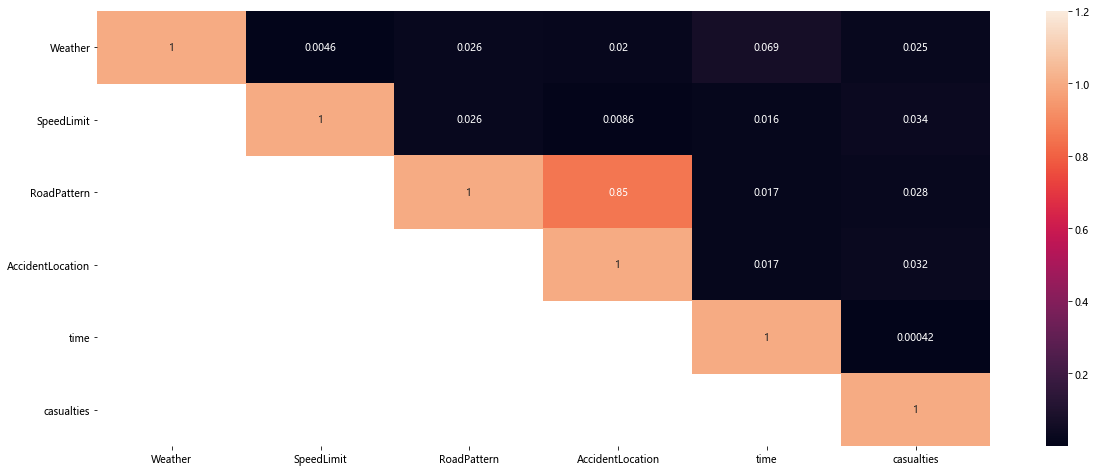

In [43]:
import seaborn as sns
fig,ax = plt.subplots(figsize=(20,8))
corrcoef1_new = abs(df_new[["Weather","SpeedLimit","RoadPattern","AccidentLocation","time","casualties"]].corr())
mask = np.array(corrcoef1_new)
mask[np.triu_indices_from(mask)] = False 
sns.heatmap(corrcoef1_new, mask=mask, vmax=1.2, annot=True, ax=ax)
plt.show();

In [44]:
upperTriangleDF = corrcoef1_new.where(np.triu(np.ones(corrcoef1_new.shape), k=1).astype(np.bool))
toDrop = [column for column in upperTriangleDF.columns[0:6] if any(upperTriangleDF[column] > 0.5)]
toDrop.append([ndx for ndx in upperTriangleDF['casualties'].index[0:6] if upperTriangleDF['casualties'].at[ndx]< 0.1][0])
remainFeatureDF = upperTriangleDF.drop(toDrop, axis=1)
side_by_side('拋棄的特徵:',toDrop,'選擇的特徵:',remainFeatureDF.columns)

'拋棄的特徵:'    ['AccidentLocation', 'Weather']    '選擇的特徵:'    Index(['SpeedLimit', 'RoadPattern', 'time', 'casualties'], dtype='object')



## 一樣使用速限(SpeedLimit), 道路型態(RoadPattern), 時間(time)<br>為變因來預測死傷人數(casualties)

In [45]:
x = np.array(df_new[['SpeedLimit', 'RoadPattern', 'Weather']])
y = np.array(df_new['casualties'])

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)

In [47]:
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
LR.score(x_test, y_test)

0.0026339655855623922

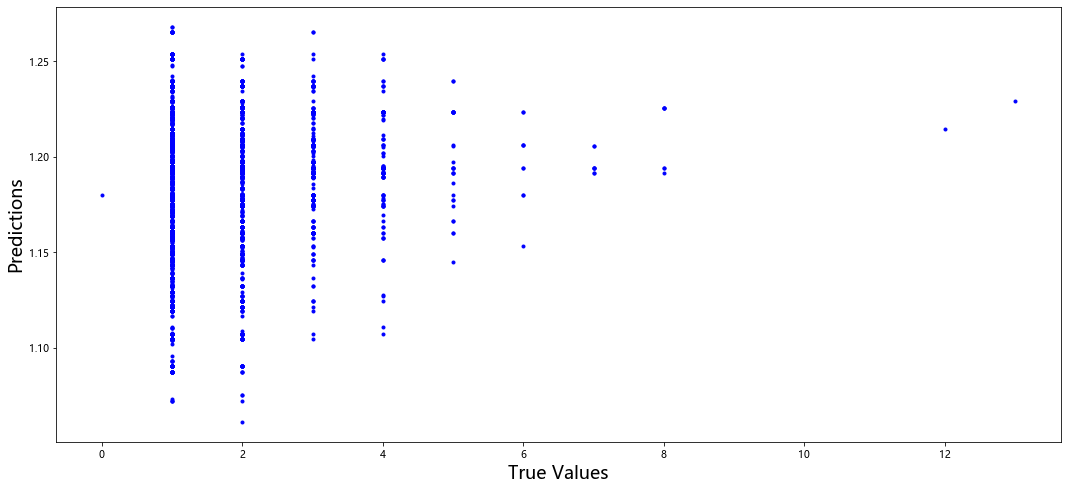

Performance:0.0026339655855623922


In [49]:
predictions = LR.predict(x_test)
fig,ax = plt.subplots(figsize=(18,8))
ax.plot(y_test,predictions,"b.")
ax.set_xlabel("True Values", fontsize=18)
ax.set_ylabel("Predictions", fontsize=18)
plt.show()
score = LR.score(x_test,y_test)

print(f'Performance:{score}')

#### 訓練結果為0.0026339655855623922

# 結論二

## 1.造成車禍的原因不僅僅為道路型態、速限、時段，還有許多因素包含在裡面，人為因素、車輛因素、路況因素、環境因素，人為因素可能為酒駕、疲勞駕駛、駕駛不遵守交通規則等等，車輛因素可能為爆胎、煞車故障等等，路況因素可能為交通號誌故障、路不平等等。
## 2.在統計的數據裡，速度最小值為零，它可能是極端值，但有可能停在路邊被砸到(盆栽、人為等等)，或者天災影響，光是速度為零就佔了約5%，所以我們不覺得要排除掉。
## 3.在最初的數據裡，車種種類多元，有遊覽車、機車、大客車等等，我們想在不同車種發車禍所造成的傷亡可能差距會太大，像是遊覽車可能一次會有數十人，而我們決定進行第二次測試，在第二次我們單純的只用自用小客車的數據，變因也使用同樣的，我們可以發現準確率從0.0003提升到0.002，推斷車種也有可能間接影響死傷人數，但依舊無法逃離第一點所描述的，車禍的變因過多的問題。

In [50]:
df.describe()

,Weather,SpeedLimit,RoadPattern,AccidentLocation,time,death,injured,casualties
count,374229.000000,374229.000000,374229.000000,374229.000000,374229.000000,374229.000000,374229.000000,374229.000000
mean,7.495651,44.859741,7.353527,4.465723,5.434672,0.004524,1.402377,1.406901
std,0.783411,11.914992,4.868290,4.475734,1.956197,0.076871,0.748080,0.752114
min,1.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,7.000000,40.000000,4.000000,1.000000,4.000000,0.000000,1.000000,1.000000
50%,8.000000,50.000000,4.000000,2.000000,6.000000,0.000000,1.000000,1.000000
75%,8.000000,50.000000,14.000000,9.000000,7.000000,0.000000,2.000000,2.000000
max,8.000000,100.000000,17.000000,22.000000,8.000000,4.000000,22.000000,22.000000


In [51]:
print("速度為零百分比:",len(df.query('SpeedLimit==0'))/len(df)*100,"%")

速度為零百分比: 4.792252871904636 %


# 五、數據來源

## <a href="https://data.taipei/#/dataset/detail?id=2f238b4f-1b27-4085-93e9-d684ef0e2735">台北資料大平台</a> 
##  <a href="https://www.thb.gov.tw/sites/ch/modules/StatisticsSex/StatisticsSex-List?node=b2726f57-5e6f-4336-bf83-c6a85fad887c">中華民國交通部公路總局 </a>

# 六、選定學習模式的短文

## 此次選擇多元線性回歸是因為在預測來年車禍的傷亡人數上推估影響因素會有兩個以上。

## 多元線性回歸:[1]

### 多元回歸分析預測法，是指通過對兩個或兩個以上的自變數與一個因變數的相關分析，建立預測模型進行預測的方法。當自變數與因變數之間存線上性關係時，稱為多元線性回歸分析。
### 假設y為因變數，$x_{1}, x_{2}, … x_{k}$ 為自變數，並且自變數語音變數之間為線性關係時，<br>則多元線性回歸模型為: $$ y = b_{0} + x_{1} \, b_{1} + x_{2} \, b_{2} + \cdots + x_{k} \, b_{k} \ $$
### 建立多元性回歸模型時，為了保證回歸模型具有優良的解釋能力和預測效果，自變數的選擇其準則為：
### (1)自變數對因變數必須有顯著的影響，並呈密切的線性相關；
### (2)自變數與因變數之間的線性相關必須是真實的，而不是形式上的；
### (3)自變數之間應具有一定的互斥性，即自變數之間的相關程度不應高於自變數與因變數之因的相關程度；
### (4)自變數應具有完整的統計數據，其預測值容易確定。

### 多元性回歸模型的參數估計，同一元線性回歸方程一樣，也是在要求誤差平方和($\sum e^2$)為最小的前提下，用最小二乘法求解參數
### 多元線性回歸模型的檢驗
### (1)擬合程度的測定:<br>與一元線性回歸中可決繫數$r^2$相對應，多元線性回歸中也有多重可決繫數$r^2$，它是在因變數的總變化中，由回歸方程解釋的變動(回歸平方和)所占的比重，$R^2$越大，回歸方各對樣本數據點擬合的程度越強，所有自變數與因變數的關係越密切。
### $　　R^2=\frac{\sum(\hat{y}-\bar{y})^2}{\sum(y-\bar{y})^2}=1-\frac{\sum(y-\hat{y})^2}{\sum(y-\bar{y})^2}$
### (2)估計標準誤差:<br>估計標準誤差，即因變數y的實際值與回歸方程求出的估計值$\hat{y}$之間的標準誤差，估計標準誤差越小，回歸方程擬合程度越程。
### $S_y=\sqrt{\frac{\sum(y-\hat{y})^2}{n-k-1}}$
### $v_k=\frac{S_y}{y}$
### (3)回歸方程的顯著性檢驗:<br>回歸方程的顯著性檢驗，即檢驗整個回歸方程的顯著性，或者說評價所有自變數與因變數的線性關係是否密切。能常採用F檢驗，根據給定的顯著水平a,自由度(k,n-k-1)查F分佈表，得到相應的臨界值$F_{a}$，若$F > F_{a}$，則回歸方程具有顯著意義，回歸效果顯著；$F < F_{a}$，則回歸方程無顯著意義，回歸效果不顯著。
### $F=\frac{\sum(\hat{y}-\bar{y})^2/k}{\sum(y-\hat{y})^2/n-k-1}=\frac{R^2/k}{(1-R^2)/n-k-1}$
### (4)回歸繫數的顯著性檢驗:<br>在一元線性回歸中，回歸繫數顯著性檢驗(t檢驗)與回歸方程的顯著性檢驗(F檢驗)是等價的，但在多元線性回歸中，這個等價不成立。t檢驗是分別檢驗回歸模型中各個回歸繫數是否具有顯著性，以便使模型中只保留那些對因變數有顯著影響的因素。檢驗時先計算統計量$t_{i}$；然後根據給定的顯著水平a,自由度n-k-1查t分佈表，得臨界值$t_{a}$或$t_{a/2},t > t − a或t_{a/2}$，則回歸繫數$b_{i}$與0有顯著關異，反之，則與0無顯著差異。
### 　　$t_i=\frac{b_i}{s_y\sqrt{C_{ij}}}=\frac{b_i}{s_{bi}}$
### (5)多重共線性判別:<br>若某個回歸繫數的t檢驗通不過，可能是這個繫數相對應的自變數對因變數的影平不顯著所致，此時，應從回歸模型中剔除這個自變數，重新建立更為簡單的回歸模型或更換自變數。也可能是自變數之間有共線性所致，此時應設法降低共線性的影響。多重共線性是指在多元線性回歸方程中，自變數之間有較強的線性關係，這種關係若超過了因變數與自變數的線性關係，則回歸模型的穩定性受到破壞，回歸繫數估計不准確。需要指出的是，在多元回歸模型中，多重共線性的難以避免的，只要多重共線性不太嚴重就行了。降低多重共線性的辦法主要是轉換自變數的取值，如變絕對數為相對數或平均數，或者更換其他的自變數。
### (6).D.W檢驗:<br>當回歸模型是根據動態數據建立的，則誤差項e也是一個時間序列，若誤差序列諸項之間相互獨立，則誤差序列各項之間沒有相關關係，若誤差序列之間存在密切的相關關係，則建立的回歸模型就不能表述自變數與因變數之間的真實變動關係。D.W檢驗就是誤差序列的自相關檢驗。

# 七、引用的文章，論文和書籍

## [1]https://wiki.mbalib.com/zh-tw/%E5%A4%9A%E5%85%83%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92%E5%88%86%E6%9E%90%E9%A2%84%E6%B5%8B%E6%B3%95
## [2]課堂講義